# *This Notebook will provide a ML model to classify the content of the tweets in tweets dataset from kaggle using Kares NLP. The tweets is going to be classified as Positive or Negative based on the content of the tweet.*


##About Dataset

*   This Dataset was gathered by crawling Twitter's REST API using the Python library tweepy 3. This dataset contains the tweets of the 20 most popular twitter users (with the most followers) whereby retweets are neglected.
 These accounts belong to public people, such as Katy Perry and Barack Obama,

*   Platforms, YouTube, Instagram, and television channels shows, e.g., CNN Breaking News and The Ellen Show. -Consequently, the dataset contains a mix of relatively structured tweets, tweets written in a formal and informative manner, and completely unstructured tweets written in a colloquial style.
 Unfortunately, the geocoordinates were not available for those tweets. - H



*   This Dataset has been used to generate reserach paper under title "Machine Learning Techniques for Anomalies Detection in Post Arrays". -Crawled attributes are: Author (Twitter User), Content (Tweet), Date_Time, id (Twitter User ID), language (Tweet Langugage), Number_of_Likes, Number_of_Shares.
 Overall: 52543 tweets of top 20 users in twitter Screen_Name #Tweets Time span

*  (in days) TheEllenShow 3,147 - 662 jimmyfallon 3,123 - 1231 ArianaGrande 3,104 - 613 YouTube 3,077 - 411 KimKardashian 2,939 - 603 katyperry 2,924 - 1,598 selenagomez 2,913 - 2,266 rihanna 2,877 - 1,557 BarackObama 2,863 - 849 britneyspears 2,776 - 1,548 instagram 2,577 - 456 shakira 2,530 - 1,850 Cristiano 2,507 - 2,407 jtimberlake 2,478 - 2,491 ladygaga 2,329 - 894 Twitter 2,290 - 2,593 ddlovato 2,217 - 741 taylorswift13 2,029 - 2,091 justinbieber 2,000 - 664 cnnbrk 1,842 - 183 (2017)



# 1. 🔧 Setup and Install Libraries


This cell sets up the environment by installing necessary libraries for the project, including `keras-nlp`, `keras-core`, and `textblob`. It then imports several libraries commonly used in data science and machine learning, such as pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for plotting, os for operating system interactions, zipfile for working with zip archives, tensorflow and keras_core for building and training neural networks, keras_nlp for natural language processing tasks with Keras, and scikit-learn for splitting data and evaluating the model. It also imports TextBlob for sentiment analysis and WordCloud and collections for text visualization and analysis.

In [1]:
# ------------------------------
# 🔧 Setup & Install Libraries
# ------------------------------
!pip install -q keras-nlp --upgrade
!pip install -q keras-core --upgrade
!pip install -q textblob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import tensorflow as tf
import keras_core as keras
import keras_nlp
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.5/876.5 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 37.0 MB/s eta 0:00:00
Using TensorFlow backend


# 2. 📁  Load Dataset from Kaggle

This cell is responsible for loading the dataset from Kaggle. It uses the `kagglehub` library to download the specified dataset ("mmmarchetti/tweets-dataset"). It then iterates through the downloaded files to find a CSV file and reads it into a pandas DataFrame named `df`. There is a command to change permissions on a Kaggle settings file, which might be necessary depending on the environment and how Kaggle credentials are set up.

In [2]:
# ------------------------------
# 📁 Load Dataset from Kaggle
# ------------------------------
import kagglehub

os.makedirs("/Users/ahmedmelaih/Datascince/.kaggle", exist_ok=True)
!chmod 600 /Users/ahmedmelaih/Datascince/.kaggle/KaggleSettings.json

path = kagglehub.dataset_download("mmmarchetti/tweets-dataset")
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        break


chmod: cannot access '/Users/ahmedmelaih/Datascince/.kaggle/KaggleSettings.json': No such file or directory


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [4]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


 Data Summary

Rows: 52,542 tweets

Key Columns:

author, content, language, date_time: well-filled

number_of_likes, number_of_shares: numeric, ready for analysis

Missing Data:

country: only 36 filled

latitude, longitude: basically empty (only 1 row filled)


We are going to fill the missing values in country, latitude and longitude columns

# 3. 🧹 Clean and Prepare Data

This cell performs data cleaning and preparation on the loaded DataFrame. It fills missing values in the 'country', 'latitude', and 'longitude' columns. It then capitalizes all column names for consistency. A new DataFrame `df_clean` is created by dropping the original 'Latitude', 'Longitude', and 'Country' columns. The 'Date_time' column is converted to datetime objects, coercing any invalid parsing to NaT (Not a Time). Finally, duplicate rows based on the 'Id' column are removed, and the index is reset.

In [5]:
# ------------------------------
# 🧹 Clean and Prepare Data
# ------------------------------
df[['country']] = df[['country']].fillna('Unknown')
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].fillna(0)
df.columns = [col.capitalize() for col in df.columns]

df_clean = df.drop(columns=['Latitude', 'Longitude', 'Country'], errors='ignore')
df_clean['Date_time'] = pd.to_datetime(df_clean['Date_time'], errors='coerce')
df_clean = df_clean.drop_duplicates(subset='Id').reset_index(drop=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Author            52542 non-null  object 
 1   Content           52542 non-null  object 
 2   Country           52542 non-null  object 
 3   Date_time         52542 non-null  object 
 4   Id                52542 non-null  float64
 5   Language          52542 non-null  object 
 6   Latitude          52542 non-null  float64
 7   Longitude         52542 non-null  float64
 8   Number_of_likes   52542 non-null  int64  
 9   Number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [6]:
df.head()

,Author,Content,Country,Date_time,Id,Language,Latitude,Longitude,Number_of_likes,Number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,Unknown,12/01/2017 19:52,8.196330e+17,en,0.0,0.0,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,Unknown,11/01/2017 08:38,8.191010e+17,en,0.0,0.0,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,Unknown,11/01/2017 02:52,8.190140e+17,en,0.0,0.0,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,Unknown,11/01/2017 02:44,8.190120e+17,en,0.0,0.0,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,Unknown,10/01/2017 05:22,8.186890e+17,en,0.0,0.0,17620,4655


# 4. 💬 Create Sentiment Labels

This cell defines a function `get_sentiment` that uses the `TextBlob` library to calculate the polarity of the text content. Based on the polarity, it assigns a sentiment label: 1 for positive polarity (greater than 0) and 0 for non-positive polarity (less than or equal to 0). This function is applied to the 'Content' column of the cleaned DataFrame `df_clean` to create a new 'label' column. Rows with missing sentiment labels are dropped, and the first few rows of the 'Content' and 'label' columns are printed to show the result of the labeling process.

In [7]:
# ------------------------------
# 💬 Create Sentiment Labels
# ------------------------------
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return None
    polarity = TextBlob(text).sentiment.polarity
    #rounded_polarity = np.round(polarity, decimals=1)
    rounded_polarity= np.round(polarity)
    return 1 if rounded_polarity > 0 else 0

df_clean['label'] = df_clean['Content'].apply(get_sentiment)
df_clean = df_clean.dropna(subset=['label'])
print(df_clean[['Content', 'label']].head())



                                             Content  label
0  Is history repeating itself...?#DONTNORMALIZEH...      0
1  @barackobama Thank you for your incredible gra...      1
2                Life goals. https://t.co/XIn1qKMKQl      0
3            Me right now 🙏🏻 https://t.co/gW55C1wrwd      0
4  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...      0


# 5. 📊 : Visual EDA (Sentiment Focused)

This cell performs visual exploratory data analysis focusing on the sentiment labels. It uses seaborn and matplotlib to create two visualizations. The first is a countplot showing the distribution of the sentiment labels (Negative and Positive). The second visualization is a WordCloud generated from all the tweet content in the cleaned DataFrame, providing a visual representation of the most frequent words.

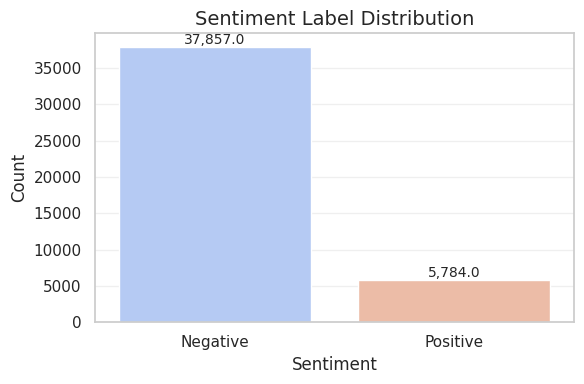

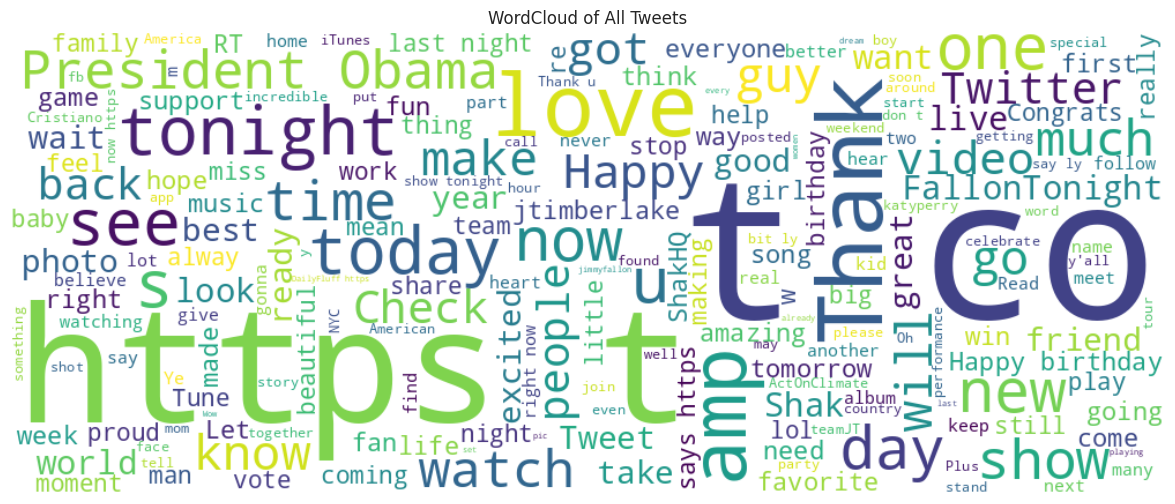

In [8]:
# ------------------------------
# 📊 Visual EDA (Sentiment Focused)
# ------------------------------
sns.set(style="whitegrid")


# 📊 - Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='label', palette='coolwarm', hue='label', legend=False)
plt.title("Sentiment Label Distribution", fontsize=14)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,}',
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#---------------------------------



#-------------

# WordCloud
all_text = " ".join(df_clean['Content'].dropna().tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of All Tweets")
plt.show()


# 6. 🧠 BERT Tokenization & Preprocessing

This cell prepares the data for the BERT model. It initializes a `BertPreprocessor` from `keras_nlp` using the "bert_small_en_uncased" preset and sets the sequence length to 128. The cleaned DataFrame is split into training and validation sets for text content (`train_texts`, `val_texts`) and corresponding labels (`train_labels`, `val_labels`) using `train_test_split`. The preprocessor is then applied to the training and validation text data to generate preprocessed inputs (`train_inputs`, `val_inputs`), which are likely token IDs, segment IDs, and padding masks required by the BERT model.

In [9]:
# ------------------------------
# 🧠 BERT Tokenization & Preprocessing
# ------------------------------
PREPROCESSOR = keras_nlp.models.BertPreprocessor.from_preset("bert_small_en_uncased", sequence_length=128)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_clean['Content'], df_clean['label'], test_size=0.2, random_state=42
)

train_inputs = PREPROCESSOR(train_texts.tolist())
val_inputs = PREPROCESSOR(val_texts.tolist())


# 7. 🔧 : Build BERT Sentiment Model

This cell builds the BERT-based sentiment classification model using `keras_nlp`. It utilizes the `TextClassifier` model from `keras_nlp`, which simplifies the process of building a text classification model with a BERT backbone. It's initialized with the "bert_small_en_uncased" preset and the `PREPROCESSOR` defined in the previous cell. The `num_classes` is set to 1 for binary classification. The model is then compiled with the Adam optimizer with a specified learning rate, 'binary_crossentropy' as the loss function (suitable for binary classification), and 'accuracy' as the evaluation metric. Finally, the model summary is printed, showing the layers and parameters of the built model.

In [10]:
# ------------------------------
# 🔧 Build BERT Sentiment Model
# ------------------------------
# Use the TextClassifier model which integrates the preprocessor and backbone
classifier = keras_nlp.models.TextClassifier.from_preset(
    "bert_small_en_uncased",
    preprocessor=PREPROCESSOR,
    num_classes=1,
)

# Configure the optimizer using a dictionary
optimizer_config = {
    "class_name": "Adam",
    "config": {"learning_rate": 1e-5}
}

classifier.compile(
    optimizer=optimizer_config,  # Pass the optimizer configuration as a dictionary
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

classifier.summary()

Preprocessor: "bert_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                                │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 512), (None,      │      28,763,648 │ padding_mask[0][0],        │
│                               │ None, 512)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 512)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 1)                 │             513 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 28,764,161 (109.73 MB)

 Trainable params: 28,764,161 (109.73 MB)

 Non-trainable params: 0 (0.00 B)

# 8. 🚀 : Train the Model

This cell trains the compiled BERT sentiment classification model. It uses the `fit` method of the `classifier` model, providing the training text data (`train_texts`), training labels (`train_labels`), and validation data (`val_texts`, `val_labels`). The training is run for 3 epochs with a batch size of 32. The `history` object returned by `fit` contains information about the training process, such as the loss and metrics values at each epoch.

In [11]:
# ------------------------------
# 🚀 Train the Model
# ------------------------------
history = classifier.fit(
    train_texts, # Pass the raw text data
    train_labels,
    validation_data=(val_texts, val_labels), # Pass the raw text data for validation
    epochs=3,
    batch_size=32
)

Epoch 1/3
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 193s 150ms/step - accuracy: 0.8548 - loss: 0.6585 - val_accuracy: 0.8699 - val_loss: 0.3723
Epoch 2/3
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 176s 141ms/step - accuracy: 0.8768 - loss: 0.4004 - val_accuracy: 0.3042 - val_loss: 1.1398
Epoch 3/3
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 203s 141ms/step - accuracy: 0.8479 - loss: 0.4026 - val_accuracy: 0.9133 - val_loss: 0.2844


# 9. 📈  Evaluate & Visualize

This cell evaluates the trained model and visualizes the results using a confusion matrix. It uses the `predict` method of the `classifier` model on the validation text data (`val_texts`) to get the model's predictions. These predictions are then converted into binary labels (0 or 1) based on a threshold of 0.5. A confusion matrix is calculated comparing the true validation labels (`val_labels`) and the predicted labels (`test_pred_labels`). Finally, the confusion matrix is visualized using `ConfusionMatrixDisplay`, showing the counts of true positives, true negatives, false positives, and false negatives, with labels "Negative" and "Positive".

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step


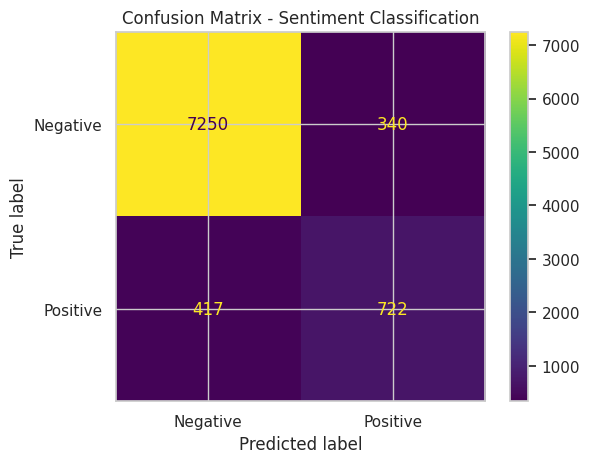

In [13]:
# ------------------------------
# 📈 Evaluate & Visualize
# ------------------------------
# Predict and binarize
test_predictions = classifier.predict(val_texts) # Pass the raw text data to predict
test_pred_labels = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(val_labels, test_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title("Confusion Matrix - Sentiment Classification")
plt.show()

In [14]:
# Create a new DataFrame with the validation texts and predicted labels
classified_df = pd.DataFrame({'Content': val_texts, 'Predicted_Label': test_pred_labels.flatten()})

# Display the first few rows of the new DataFrame
display(classified_df.head())

,Content,Predicted_Label
22081,"""@JessicaBiel: I have a bad right ear too, so ...",0
13958,.@BTWFoundation needs the voices of young peop...,0
13754,This is amazing! 👅👅👅@lucanapp98,1
25546,http://t.co/DKTKVEXRVs,0
31654,"""A Year Without Rain"" is out now!!!!!!!!! I am...",0
